In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
#rcParams["figure.figsize"] = (6,3)
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
import time
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

from itertools import product, combinations


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)
#%matplotlib notebook
#%matplotlib qt
#from matplotlib.animation import FuncAnimation

import seaborn as sns
sns.set_theme(style="ticks")

### Paramètres du modèle

| Module d'Young (GPa) | Aire ($m^2$) | Module de Poisson (-) |
| :---: | :---: | :---: |
| 10 | 0.111 | 0.3 |


Nombre d'elements :  20
Nombre de noeuds :  10
ancrage : [-100.  100.    0.]
ancrage : [100. 100.   0.]
ancrage : [ 100. -100.    0.]
ancrage : [-100. -100.    0.]
Axial Forces (positive = tension, negative = compression) :
 [[ -5.55      ]
 [ 11.16346535]
 [-22.8585243 ]
 [ -3.72115512]
 [ -9.037091  ]
 [-12.99156734]
 [ -1.29915673]
 [  2.59831347]
 [-18.18819427]
 [ 38.834774  ]
 [  5.55      ]
 [-10.74272209]
 [  0.        ]
 [-38.37495084]
 [-44.42642071]
 [-13.0215371 ]
 [ -9.57465964]
 [ 44.66428571]
 [ 12.86007016]
 [  5.55      ]]
Reaction forces (positive = upward, negative = downward) : 
 [[ -8.         -17.5         -9.5       ]
 [  6.625       -2.5         -2.25      ]
 [ -4.4375       9.75         7.        ]
 [ 13.24061596  29.12935511  21.18498554]]
Deformation at nodes 
 [[-6.66132425e+14 -1.66533106e+15 -6.24499148e+14]
 [-6.66132425e+14  3.33066212e+14  6.24499148e+14]
 [ 3.74588868e+00 -1.13186325e+01  1.87799264e+00]
 [ 3.02002908e+00 -2.85485325e+14  3.92542322e+1

C:\Users\ngameiro\AppData\Local\Temp/ipykernel_5092/301530149.py:25: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


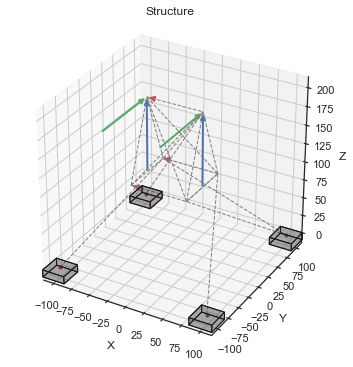

In [12]:
E = 1e4
A = 0.111
nu = 0.3

nodes = []
bars = []

cas = 1 

if cas == 1 :
    ### Nodes
    H = 200
    L = 37.5
    l = L
    nodes.append([-L,0,H])
    nodes.append([L,0,H])
    nodes.append([-L,L,H/2])
    nodes.append([L,L,H/2])
    nodes.append([L,-L,H/2])
    nodes.append([-L,-L,H/2])

    nodes.append([-H/2,H/2,0])
    nodes.append([H/2,H/2,0])
    nodes.append([H/2,-H/2,0])
    nodes.append([-H/2,-H/2,0])

    ### Bars
    #socle 1
    bars.append([0,1])
    bars.append([3,0])
    bars.append([2,1])
    bars.append([4,0])
    bars.append([5,1])
    bars.append([3,1])
    bars.append([4,1])

    bars.append([2,0])
    bars.append([5,0])
    bars.append([5,2])

    bars.append([4,3])
    bars.append([2,3])
    bars.append([5,4])

    bars.append([9,2])
    bars.append([6,5]) 
    bars.append([8,3])
    bars.append([7,4])

    bars.append([1,6])
    bars.append([2,7])
    bars.append([3,4])
    
    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)

    #Apply force
    P = np.zeros_like(nodes)
    P[0,0] = 1
    P[0,1] = -10
    P[0,2] = -10
    P[1,1] = -10
    P[1,2] = -10
    P[2,0] = 0.5
    P[5,0] = 0.6

    # support displacement
    Ur = [0,0,0,0,0,0,0,0,0,0,0,0]

    DOFCON = np.ones_like(nodes).astype(int)
    DOFCON[6,:] = 0
    DOFCON[7,:] = 0
    DOFCON[8,:] = 0
    DOFCON[9,:] = 0
elif cas == 2 :
    nodes.append([0,0,0])
    nodes.append([1/2,-1,0])
    nodes.append([1,1/2,0])
    nodes.append([1,1,1])
    
    bars.append([0,1])
    bars.append([1,2])
    bars.append([2,3])
    bars.append([0,3])
    
    nodes = np.array(nodes).astype(float)
    bars = np.array(bars)
    
    #Apply force
    P = np.zeros_like(nodes)
    P[3,0] = 1
    P[3,1] = -10
    P[3,2] = -10

    # support displacement
    Ur = [0,0,0,0,0,0,0,0]

    DOFCON = np.ones_like(nodes).astype(int)
    DOFCON[0,:] = 0
    DOFCON[1,:] = 0
    DOFCON[2,0:2] = 0


print("Nombre d'elements : ",len(bars))
print("Nombre de noeuds : ", len(nodes))

#plt.ion()

def plot_anc(ax,x,y,z):
    Lx = 30
    Ly = 30
    Lz = 10
    points = np.array([[-Lx/2, -Ly/2, -Lz],
                      [Lx/2, -Ly/2, -Lz ],
                      [Lx/2, Ly/2, -Lz],
                      [-Lx/2, Ly/2, -Lz],
                      [-Lx/2, -Ly/2, 0],
                      [Lx/2, -Ly/2, 0 ],
                      [Lx/2, Ly/2, 0],
                      [-Lx/2, Ly/2, 0]])
    center = np.array([[x,y,z] for i in range(8)])
    points = points + center
    Z = points
    Z = 1.0*Z
    verts = [[Z[0],Z[1],Z[2],Z[3]],
             [Z[4],Z[5],Z[6],Z[7]],
             [Z[0],Z[1],Z[5],Z[4]],
             [Z[2],Z[3],Z[7],Z[6]],
             [Z[1],Z[2],Z[6],Z[5]],
             [Z[4],Z[7],Z[3],Z[0]]]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='k', linewidths=1, 
                                         edgecolors='k', 
                                         alpha=0.2, zorder = 1))
    ax.scatter(x,y,z, c='r', s=10, zorder=10)


def plot_global_axis(ax):
    v = np.eye(3)
    c = ["r", "g", "b"]
    print(v)
    for i in range(len(v)):
        ax.quiver(*[0,0,0], *v[i,:], color = c[i], length=10)
        
def plot_load(ax, scale = 10):
    nn = len(nodes)
    for i in range(nn) :
        Fx, Fy, Fz = P[i, 0], P[i, 1], P[i, 2]
        x, y, z = nodes[i,0], nodes[i,1], nodes[i,2]
        if True :
            fx = Arrow3D([x + Fx * scale, x],
                        [y, y],
                        [z, z],
                        mutation_scale=10,
                        lw=2, arrowstyle="-|>", color="r")
            fy = Arrow3D([x, x],
                        [y + Fy * scale, y],
                        [z, z],
                        mutation_scale=10,
                        lw=2, arrowstyle="-|>", color="g")
            fz = Arrow3D([x, x],
                        [y, y],
                        [z + Fz * scale, z],
                        mutation_scale=10,
                        lw=2, arrowstyle="-|>", color="b")
            ax.add_artist(fx)
            ax.add_artist(fy)
            ax.add_artist(fz)
    
def plot3D(nodes,c,lt,lw,lg) : 
    fig = plt.figure(figsize=(8,6))
    #plt.gca(projection='3d')
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(bars)) :
        xi,xj = nodes[bars[i,0],0],nodes[bars[i,1],0]
        yi,yj = nodes[bars[i,0],1],nodes[bars[i,1],1]
        zi,zj = nodes[bars[i,0],2],nodes[bars[i,1],2]
        line, = ax.plot([xi,xj],[yi,yj],[zi,zj],color = c, lw = lw, linestyle = lt)
        line.set_label(lg)
        #plt.draw()
        #fig.canvas.draw()
        #plt.pause(0.1)
        #ax.cla()
        #fig.canvas.flush_events()
    ax.set_title("Structure")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    '''
    ax.set_xlim([-100,100])
    ax.set_ylim([-100,100])
    ax.set_zlim([-100,100])
    '''
    ax.set_box_aspect([1,1,1])
    #plot_global_axis(ax)
    plot_load(ax)
    
    ### Plot BC
    for i in range(len(DOFCON)):
        if (DOFCON[i,0] == 0) and (DOFCON[i,1] == 0) and (DOFCON[i,2] == 0):
            print("ancrage :", nodes[i,:])
            plot_anc(ax,*nodes[i,:])
            
    #geom3D(nodes,ax)
    
def plot2D(nodes,c,lt,lw,lg) : 
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    for i in range(len(bars)) :
        xi,xj = nodes[bars[i,0],0],nodes[bars[i,1],0]
        yi,yj = nodes[bars[i,0],1],nodes[bars[i,1],1]
        line, = ax.plot([xi,xj],[yi,yj],color = c, lw = lw, linestyle = lt)
        line.set_label(lg)
        #plt.draw()
        #fig.canvas.draw()
        #plt.pause(0.1)
        #ax.cla()
        #fig.canvas.flush_events()
    ax.set_title("Atom velocity distribution")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    geom2D(nodes,ax)
    
def rotate(x,y,xo,yo,c,s): #rotate x,y around xo,yo by theta (rad)
    xr=c*(x-xo)-s*(y-yo)   + xo
    yr=s*(x-xo)+c*(y-yo)  + yo
    return xr,yr
    
def plot(nodes, Dnodes, scale = None):
    ne = len(bars)
    fig, axs = plt.subplots(3)
    
    # utils
    d = nodes[bars[:,1],:] - nodes[bars[:,0],:]
    L = np.sqrt((d**2).sum(axis=1))
    angle = d.T/L
    c = angle[0]
    s = angle[1]
    
    # Displacement
    for i in range(ne):
        xi, xj = nodes[bars[i,0],0], nodes[bars[i,1],0]
        yi, yj = nodes[bars[i,0],1], nodes[bars[i,1],1]
        axs[0].plot([xi,xj], [yi, yj], 'b', linewidth = 1)
    for i in range(ne):
        dxi, dxj = Dnodes[bars[i,0],0], Dnodes[bars[i,1],0]
        dyi, dyj = Dnodes[bars[i,0],1], Dnodes[bars[i,1],1]
        axs[0].plot([dxi,dxj], [dyi, dyj], 'r', linewidth = 1)
        
    # T/C 
    for i in range(ne):
        xi, xj = nodes[bars[i,0],0], nodes[bars[i,1],0]
        yi, yj = nodes[bars[i,0],1], nodes[bars[i,1],1]
        axs[1].plot([xi,xj], [yi, yj], 'b', linewidth = 1)
    for i in range(ne):
        xi, xj = nodes[bars[i,0],0], nodes[bars[i,1],0]
        yi, yj = nodes[bars[i,0],1], nodes[bars[i,1],1]
        Nmax = np.max(N)
        t = N[i]/Nmax
        print(i+1,c[i],s[i])
        xri, yri = rotate(xi,t,xi,yi,c[i],s[i])
        xrj, yrj = rotate(xj,t,xj,yj,c[i],s[i])
        axs[1].plot([xi, xri, xrj, xj], [yi, yri, yrj, yj], 'r', linewidth = 2)
        if t > 0 :
            axs[1].fill([xi, xri, xrj, xj], [yi, yri, yrj, yj], 'c', alpha = 0.3)
        else : 
            axs[1].fill([xi, xri, xrj, xj], [yi, yri, yrj, yj], 'y', alpha = 0.3)
        axs[1].text(xi,yi, str(round(t,4)),rotation = 0)
    
    axs[0].set_aspect(1)
    axs[1].set_aspect(1)
    
    v1 = [0,-1]
    v2 = [0.5,-1]
    rotate(*v1,1,0,-0.5,0.86)
    V = np.array([v1, v2])
    origin = np.array([[0, 0],[0, 0]]) # origin point

    axs[2].quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=10)
    

def geom3D(NL,ax) : 
    x = [x for x in NL[:,0]]
    y = [y for y in NL[:,1]]
    z = [z for z in NL[:,2]]
    size = 400
    offset = size/4000.
    ax.scatter(x, y, z, c='y', s=size, zorder=1)
    for i, location in enumerate(zip(x,y)):
        #plt.annotate(i+1, (location[0]-offset, location[1]-offset), zorder=10)
        ax.text(x[i],y[i],z[i],str(i+1),size=20,zorder=2,color = "k")

def geom2D(NL,ax) : 
    x = [x for x in NL[:,0]]
    y = [y for y in NL[:,1]]
    size = 400
    offset = size/4000.
    ax.scatter(x, y, c='y', s=size, zorder=1)
    for i, location in enumerate(zip(x,y)):
        #plt.annotate(i+1, (location[0]-offset, location[1]-offset), zorder=10)
        ax.text(x[i],y[i],str(i+1),size=20,zorder=2,color = "k")
        
def truss_analyse(DOF,nodes,bars):
    NN = len(nodes)
    NE = len(bars)
    NDOF = DOF*NN
    d = nodes[bars[:,1],:] - nodes[bars[:,0],:]
    L = np.sqrt((d**2).sum(axis=1))
    angle = d.T/L
    a = np.concatenate((-angle.T,angle.T),axis=1)
    K = np.zeros([NDOF,NDOF])
    for k in range(NE) :
        aux = DOF*bars[k,:]
        index = np.r_[aux[0]:aux[0]+DOF,aux[1]:aux[1]+DOF]
        
        ES = np.dot(a[k][np.newaxis].T*E*A,a[k][np.newaxis]/L[k])
        K[np.ix_(index,index)] = K[np.ix_(index,index)] + ES
        
    #print("distance : \n",d,"\n Longeuur \n",L,"\n angle \n",a,"\n Raideur matrice \n",K,"\n")
    
    freeDOF = DOFCON.flatten().nonzero()[0]
    supportDOF = (DOFCON.flatten() == 0).nonzero()[0]
    #print(supportDOF)
    
    Kff = K[np.ix_(freeDOF,freeDOF)]
    Kfr = K[np.ix_(freeDOF,supportDOF)]
    Krf = Kfr.T
    Krr = K[np.ix_(supportDOF,supportDOF)]
    Pf = P.flatten()[freeDOF]
    Uf = np.linalg.solve(Kff,Pf)
    U = DOFCON.astype(float).flatten()
    U[freeDOF] = Uf
    U[supportDOF] = Ur
    U = U.reshape(NN,DOF)
    u = np.concatenate((U[bars[:,0]],U[bars[:,1]]),axis=1)
    N = E*A/L[:]*(a[:]*u[:]).sum(axis=1)
    R = (Krf[:]*Uf).sum(axis=1) + (Krr[:]*Ur).sum(axis=1)
    R = R.reshape(2*(DOF-1),DOF)
    return np.array(N),np.array(R),U

plot3D(nodes,'gray','--',1,'undeformed')
N, R, U = truss_analyse(3,nodes,bars)
print("Axial Forces (positive = tension, negative = compression) :\n", N[np.newaxis].T)
print("Reaction forces (positive = upward, negative = downward) : \n", R)
print("Deformation at nodes \n", U)    
scale = 1
Dnodes = U*scale + nodes
#plot3D(Dnodes,'red','-',2,'deformed')

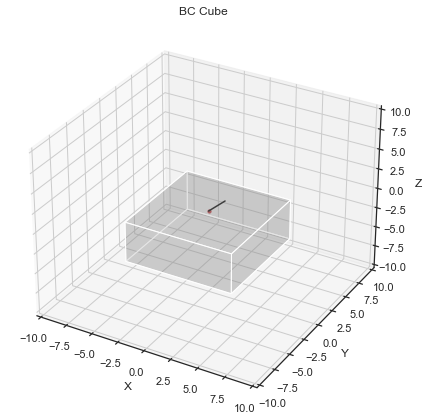

In [3]:
def plot_bc(ax,c,H,L,l):
    # draw cube
    r = [-H/2, H/2]
    for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            ax.plot3D(*zip(s, e), color="b")
            
def plot_cl(ax,x,y,z):
    Lx = 10
    Ly = 10
    Lz = 5
    points = np.array([[-Lx/2, -Ly/2, -Lz/2],
                      [Lx/2, -Ly/2, -Lz/2 ],
                      [Lx/2, Ly/2, -Lz/2],
                      [-Lx/2, Ly/2, -Lz/2],
                      [-Lx/2, -Ly/2, Lz/2],
                      [Lx/2, -Ly/2, Lz/2 ],
                      [Lx/2, Ly/2, Lz/2],
                      [-Lx/2, Ly/2, Lz/2]])
    center = np.array([[x,y,z] for i in range(8)])
    points = points + center
    Z = points
    Z = 1.0*Z
    verts = [[Z[0],Z[1],Z[2],Z[3]],
             [Z[4],Z[5],Z[6],Z[7]],
             [Z[0],Z[1],Z[5],Z[4]],
             [Z[2],Z[3],Z[7],Z[6]],
             [Z[1],Z[2],Z[6],Z[5]],
             [Z[4],Z[7],Z[3],Z[0]]]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='gray', linewidths=1, 
                                         #edgecolors='k', 
                                         alpha=.20))
    ax.scatter(x,y,z, c='r', s=10, zorder=1)
    
def plot_anc(ax,x,y,z):
    Lx = 10
    Ly = 10
    Lz = 5
    points = np.array([[-Lx/2, -Ly/2, -Lz],
                      [Lx/2, -Ly/2, -Lz ],
                      [Lx/2, Ly/2, -Lz],
                      [-Lx/2, Ly/2, -Lz],
                      [-Lx/2, -Ly/2, 0],
                      [Lx/2, -Ly/2, 0 ],
                      [Lx/2, Ly/2, 0],
                      [-Lx/2, Ly/2, 0]])
    center = np.array([[x,y,z] for i in range(8)])
    points = points + center
    Z = points
    Z = 1.0*Z
    verts = [[Z[0],Z[1],Z[2],Z[3]],
             [Z[4],Z[5],Z[6],Z[7]],
             [Z[0],Z[1],Z[5],Z[4]],
             [Z[2],Z[3],Z[7],Z[6]],
             [Z[1],Z[2],Z[6],Z[5]],
             [Z[4],Z[7],Z[3],Z[0]]]
    ax.add_collection3d(Poly3DCollection(verts, facecolors='gray', linewidths=1, 
                                         #edgecolors='k', 
                                         alpha=.20))
    ax.scatter(x,y,z, c='r', s=10, zorder=1)
    ax.plot([0,1],[0,1],[0,1],color = 'k')
    

fig = plt.figure(figsize=(10,6))
#plt.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
center = [0,0,0]
plot_anc(ax, *center)
#plot_bc(ax,1,1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_title("BC Cube")
plt.tight_layout()

## Sources :
- 2D : https://www.youtube.com/watch?v=Y-ILnLMZYMw
- 3D : https://www.youtube.com/watch?v=9U-j1HxchXE